# Analyzing Roulette Betting Strategies: A Simulation-Based Approach to Martingale, Fibonacci, and D'Alembert Strategies

In [1]:
import Project_functions
import pandas as pd
import requests
import statistics

## Introduction

Have you ever wondered why roulette is one of the most iconic casino games in the western hemisphere? While luck and chance undeniably play a major role in determining success, is that really the whole story? What if players could strategically influence their winnings by adjusting how much they bet each round and deciding when to make changes? Perhaps roulette isn't purely a game of chance after all. In this blog post we try to answer these questions.

## Introduction to Roulette and Three Betting Strategies

Before diving into the hypothesis this blog post aims to address, let’s first explore the basics of roulette and three popular betting strategies that players often use to influence their outcomes. Understanding these fundamentals will provide the necessary context for our analysis.

### The Basics of Roulette

Roulette is a game centered around a spinning wheel divided into numbered pockets, typically ranging from 0 to 36. This is the setup in European roulette, which will be the focus of this post. In contrast, American roulette includes an additional green pocket labeled 00, which slightly alters the odds.

#### The Setup

Players place bets on a layout of numbers and options on the roulette table. These bets range from wagering on specific numbers to broader categories, such as odd/even, red/black, or groups of numbers. For simplicity, we will focus on odd/even and red/black bets, as they are straightforward and offer a payout of 1:1.

#### The Spin

Once bets are placed, the dealer spins the wheel in one direction and rolls a small ball in the opposite direction. The ball eventually lands in one of the numbered pockets.

#### The Outcome

The pocket where the ball lands determines the winning bets. Players who bet on the correct number, color, or category collect winnings based on a payout table, while others lose their bets.

### Betting Strategies: Martingale, Fibonacci, and D'Alembert

Now that we’ve covered the fundamentals of roulette, let’s delve into three popular betting strategies that players might use to increase their winnings: Martingale, Fibonacci, and D’Alembert.

#### Martingale Strategy

Start with a base bet. After a loss, double your next bet. After a win, return to your original base bet.

#### Fibonacci Strategy

This method is based on the Fibonacci sequence, where each number is the sum of the two preceding numbers (1, 1, 2, 3, 5, 8, …). Start with the first number in the sequence and bet an amount corresponding to that number (e.g., `$1`, `$10`, `$100`). After a loss, move to the next number in the sequence for your next bet. After a win, move back two steps in the sequence (or reset to the beginning if you are near the start).

#### D’Alembert Strategy

Start with a base unit (e.g., `$10`). After a loss, increase your next bet by one unit. After a win, decrease your bet by one unit, ensuring you never bet below the base unit.

## Hypothesis

With the basics out-of-the-way, we can now pose the central hypothesis of this blog post:

Can betting strategies such as Martingale, Fibonacci, or D’Alembert overcome the house edge in roulette over a long series of bets?

## Data

To investigate our hypothesis, we will utilize simulated roulette data from https://www.kaggle.com/datasets/flynn28/simulated-roulette-data. Specifically, we will analyze datasets simulating 10,000 and 100,000 rounds of roulette, processed using the Python library `pandas`. Simulated data is used because casinos typically do not make real-world roulette data publicly available, making simulations an invaluable resource for exploring patterns and testing strategies.

In [2]:
roulette_10000_rounds_df = pd.read_csv("roulette_10000_rounds.csv")
roulette_100000_rounds_df = pd.read_csv("roulette_100000_rounds.csv")

## Setup

We will begin by simulating 16 different games of roulette, covering four betting strategies: Martingale, Fibonacci, D'Alembert, and a baseline approach we’ll refer to as *no strategy*. For each strategy, we simulate four games where the player bets on red, black, even and odd. In all cases, the player begins with a base bet of `$10`, adapting subsequent bets according to the chosen strategy. For the *no strategy* baseline, the player bets a random amount between `$5` and `$20` each round. Additionally, no limit is imposed on the player’s total capital during these simulations.

## Approach and Analysis

To analyze the performance of different betting strategies, we create four functions: `no_strategy()`, `martingale_strategy()`, `fibonacci_strategy()`, and `d_alembert_strategy()`. Each function simulates its respective betting approach. Using these functions in conjunction with `plot_strategies_2x2()`, we visualize the net profit achieved by each strategy over 10,000 simulated rounds of roulette. The resulting plots are shown below.

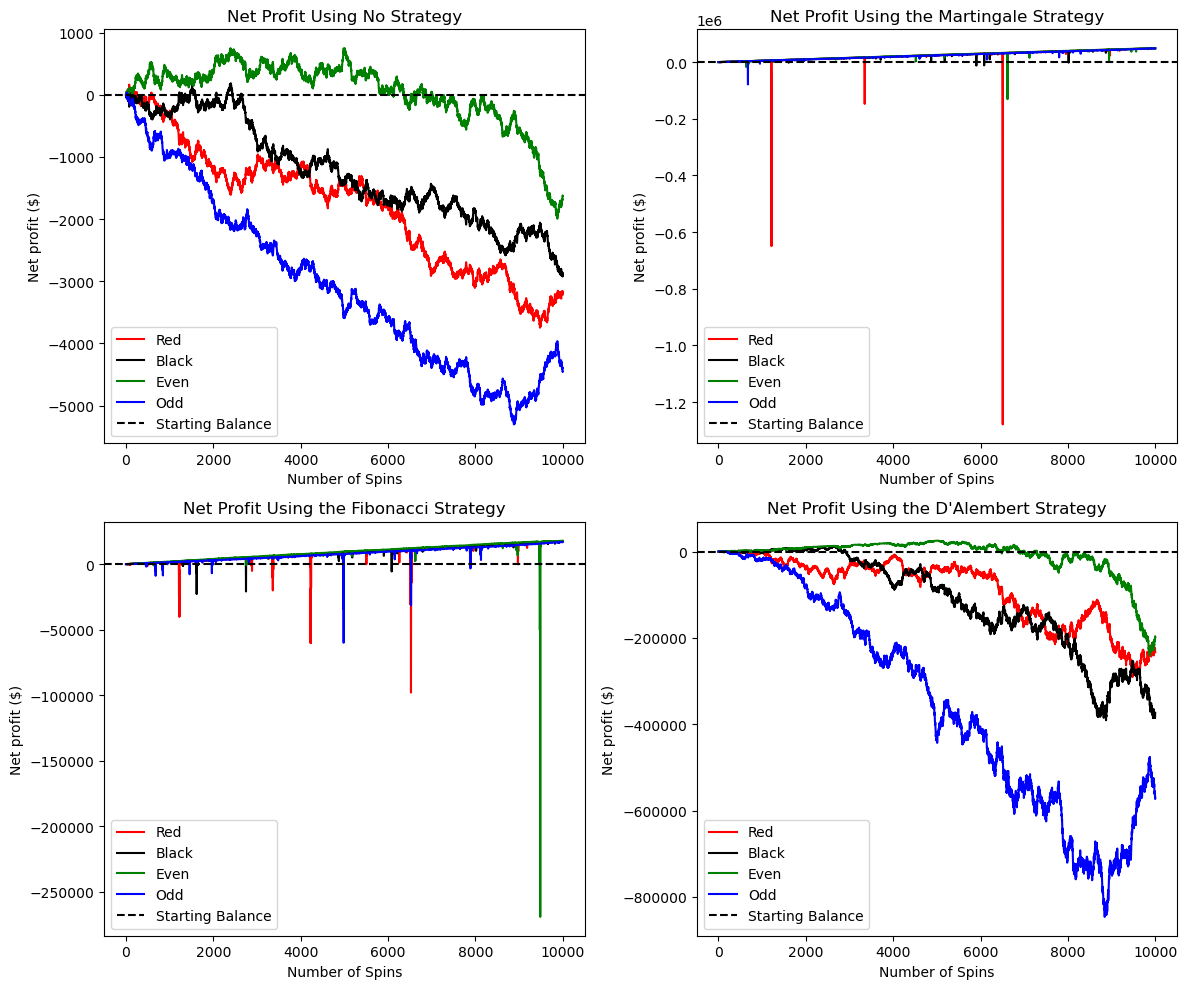

In [3]:
# Run and plot the strategies using 10,000 rounds
Project_functions.plot_strategies_2x2(roulette_10000_rounds_df, 10)

Straight away we notice a pattern in these plots. The results for the *no strategy* and D'Alembert approaches share similarities: both show jagged, fluctuating lines with a noticeable downward trend. In contrast, the plots for the Martingale and Fibonacci strategies show a steady but slow upward trajectory. To determine if these trends persist over a larger dataset, we now analyze the results using the simulated data from 100,000 rounds of roulette.

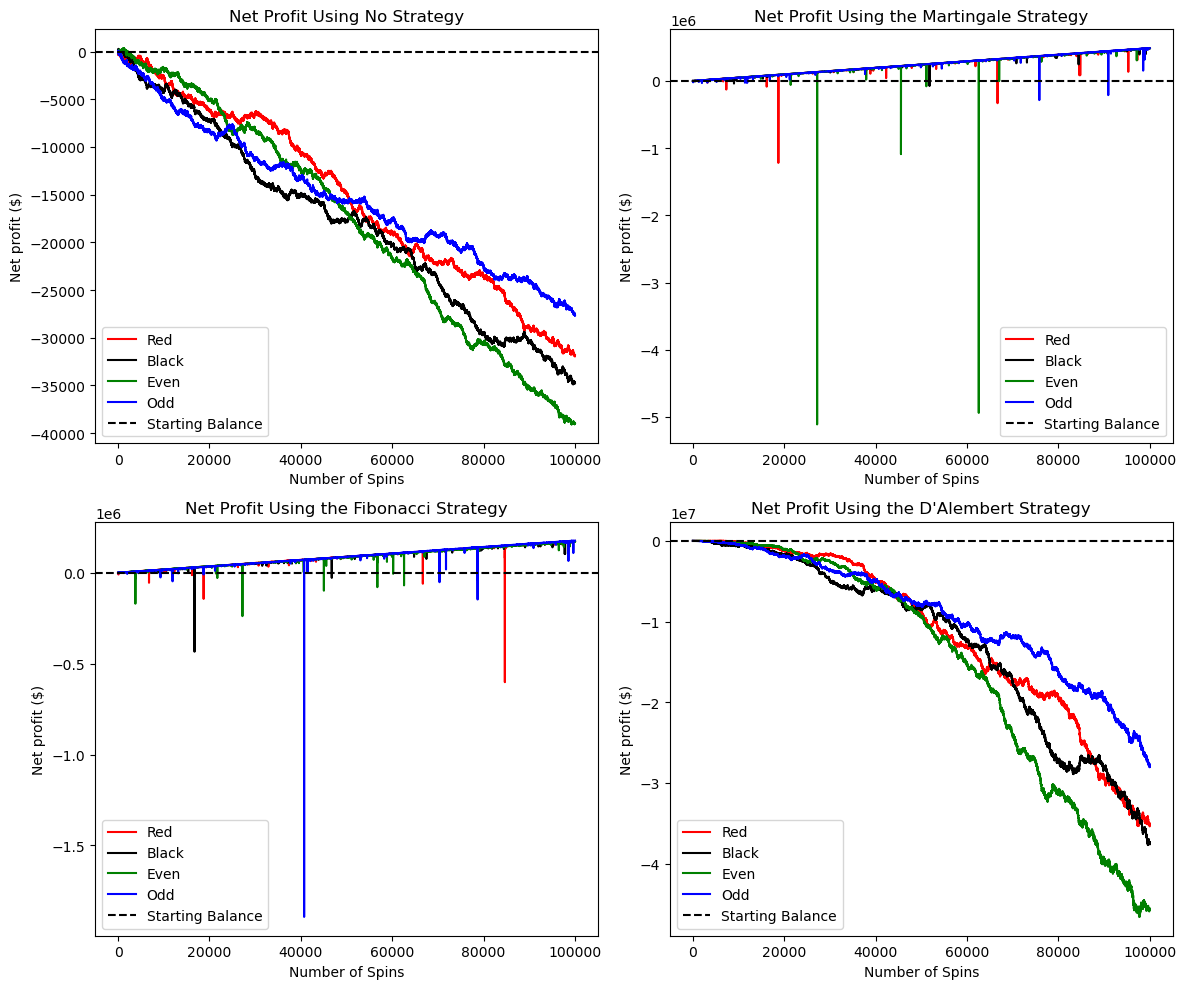

In [4]:
# Run and plot the strategies using 100,000 rounds
Project_functions.plot_strategies_2x2(roulette_100000_rounds_df, 10)

The plots confirm that the observed trends are consistent. Across simulations of both 10,000 and 100,000 rounds of roulette, the *no strategy* and D'Alembert approaches consistently result in losses.

Up to this point, we have assumed no limits on the amount a player can bet per round. However, this is unrealistic, as casinos typically impose table limits to cap bets. To reflect real-life conditions, we will continue our analysis of the Martingale and Fibonacci strategies utilizing table limits. These strategies show an upward trend, unlike the *no strategy* and D'Alembert strategies, which show a clear downward trajectory. Using table limits on these two strategies would only further constrain them, making them irrelevant to our analysis.

The table limits used in this analysis were scraped using the selenium package from online roulette games on https://www.livedealer.org/live-casino-games/table-bet-limits/ and https://roulette77.us/blog/explanation-of-betting-limits. From the scraped data, we derived the following table limits (min, max and mean of all the scraped table limits): `$500`, `$75,000` and `$18,000` (rounded down to the nearest thousand). These values form the basis of our new analysis.

To incorporate these constraints, we create three new functions: `martingale_strategy_with_table_limits()`, `fibonacci_strategy_with_table_limits()`, and `plot_strategies_2x4()`. The resulting plots are presented below as well as the code which creates the list containing the table limits.

In [5]:
# Combine the scraped table limits into one list and convert each element to an integer
combined_data = Project_functions.extract_roulette_max_bets() + Project_functions.extract_roulette_max_bets_last_row()
combined_data = [int(max_bet) for max_bet in combined_data]

# Compute min, max, and mean
min_value = min(combined_data)
max_value = max(combined_data)
mean_value = statistics.mean(combined_data)

# Create a new list with min, max and mean
table_limits = [
    min_value,
    max_value,
    int(round(mean_value, -3))
]

# Run the strategies Martingale and Fibonacci using table limits
martingale_result_10000_rounds = Project_functions.martingale_strategy_with_table_limits(roulette_10000_rounds_df, 10, table_limits)
fibonacci_result_10000_rounds = Project_functions.fibonacci_strategy_with_table_limits(roulette_10000_rounds_df, 10, table_limits)
martingale_result_100000_rounds = Project_functions.martingale_strategy_with_table_limits(roulette_100000_rounds_df, 10, table_limits)
fibonacci_result_100000_rounds = Project_functions.fibonacci_strategy_with_table_limits(roulette_100000_rounds_df, 10, table_limits)

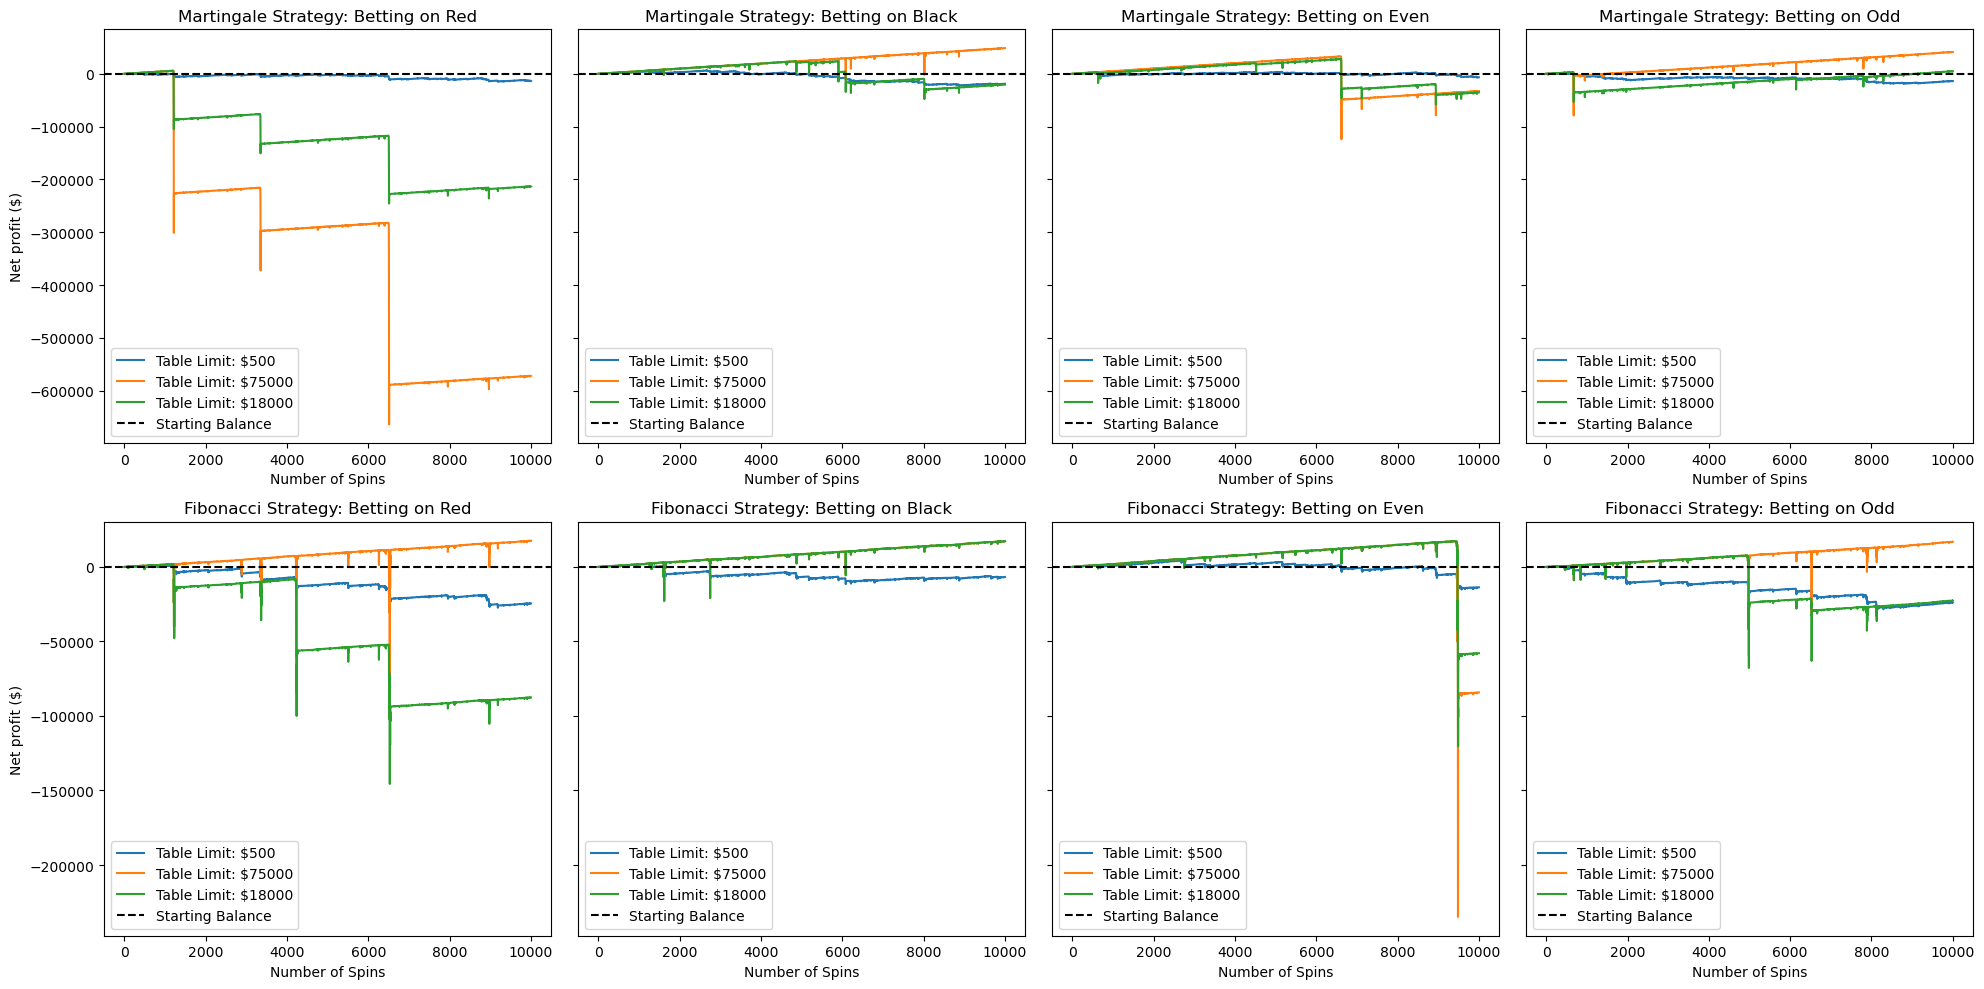

In [6]:
# Plot the strategies Martingale and Fibonacci using table limits with 10,000 rounds
Project_functions.plot_strategies_2x4(martingale_result_10000_rounds, fibonacci_result_10000_rounds, table_limits)

From these plots, we observe that approximately one-third of the lines end above the starting balance after 10,000 rounds. To investigate whether this pattern holds over longer durations, we generate similar plots using data from 100,000 rounds.

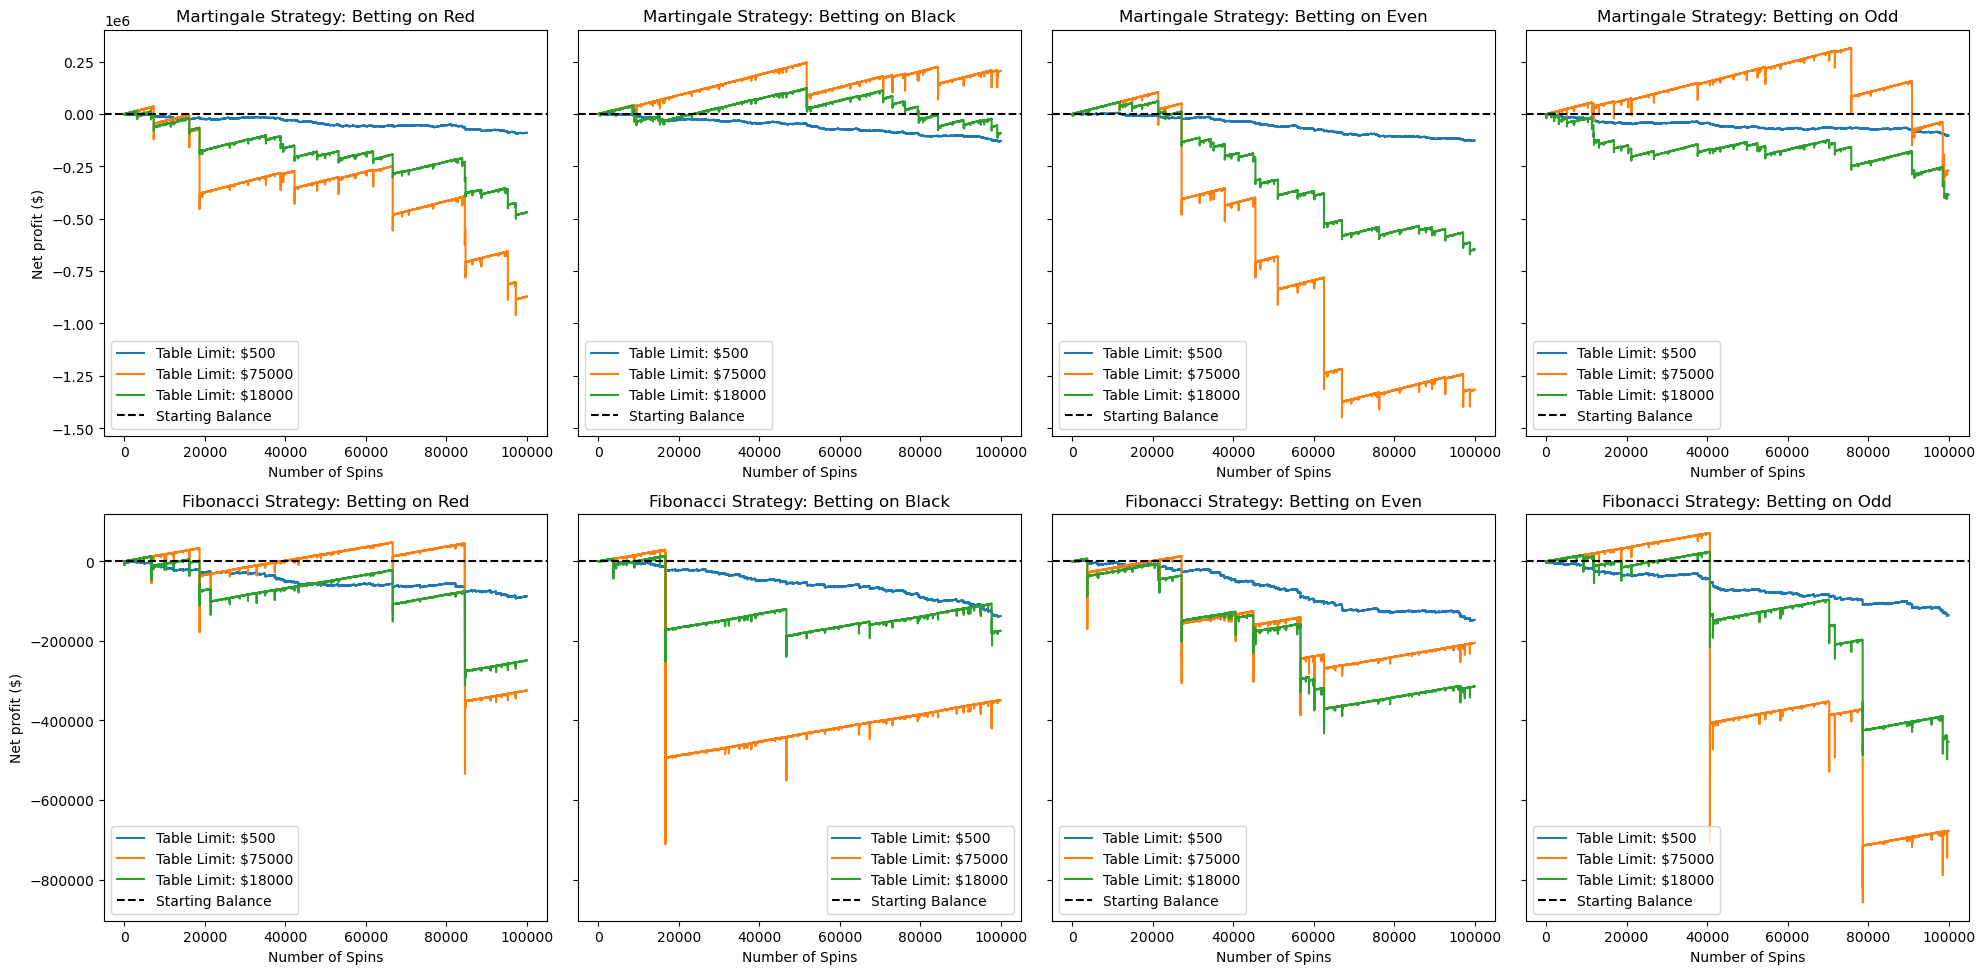

In [7]:
# Plot the strategies Martingale and Fibonacci using table limits with 100,000 rounds
Project_functions.plot_strategies_2x4(martingale_result_100000_rounds, fibonacci_result_100000_rounds, table_limits)

From these plots, we observe that only one line-the orange one in the second plot on the first row-ends above the starting balance after 100,000 rounds. This suggests that the longer the game continues, the more prominent the house edge becomes. Based on our findings thus far in this blog post, we can finally draw our conclusion.

## Result

The result from our analysis suggests that, over time, the casino will always win, although it might take a very long time. In reality, most players won’t play 100,000 rounds in one sitting, so strategies like Martingale and Fibonacci could potentially yield short-term gains. However, due to the presence of the green 0, which gives the house its advantage, the house will ultimately win in the long run. To answer our hypothesis: no, you cannot beat the house edge in roulette over an extended series of bets using betting strategies.

## Discussion

Throughout this blog post, we have relied on simulated roulette data rather than real-life data. While this may be seen as a limitation, it’s important to note that roulette is primarily a game of chance and randomness, so the use of simulated data doesn't significantly change the conclusions drawn from our analysis.

As a final note, since roulette is fundamentally a game of chance, no betting strategy can influence the probability of where the ball will land. While strategies such as Martingale and Fibonacci may offer short-term gains, they come with no guarantees and cannot overcome the house edge in the long run. Ultimately, roulette should be played with the understanding that it's a form of entertainment, not a surefire way to make money.